# Unzipping of Train and Test Files

In [ ]:
#unpack train file into jupyter notebook directory
from shutil import unpack_archive
unpack_archive('train.zip')

In [ ]:
#unpack test file into jupyter notebook directory
from shutil import unpack_archive
unpack_archive('test.zip')

# Creation of subfolders for image classes

In [8]:
#Create subfolders for image classes (Perform Once)
import os

 

cat = ['apple', 'banana', 'orange', 'mixed']

 

for i in range(len(cat)):
    train_path = os.path.join('./train', cat[i])
    test_path = os.path.join('./test', cat[i])
    os.mkdir(train_path)
    os.mkdir(test_path)

# Move JPG files into corresponding classes

In [9]:
#Move appropriate class files (.jpg) into the corresponding subfolders
import os
import shutil

 


cat = ['apple', 'banana', 'orange', 'mixed']
type_ = ['train', 'test'] #folders created after unpacking zip folders

 

for i in range(len(type_)):
    for j in range(len(cat)):
        for filename in os.listdir(type_[i]):
            if filename.endswith(".jpg") & (cat[j] in filename) :
                ori_path =  type_[i] + str('/') + cat[j]
                move_path = type_[i] + str('/') + filename
                new_path = ori_path + str('/') + filename
                shutil.move(move_path, new_path)
                continue
            else:
                continue

# Import Necessary Modules 

In [5]:
#import all necessary modules
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers,models


# Creating Inputs For Our Model via ImageDataGenerator

In [2]:
#Note: Created subdirectories(apple,banana,mixed,orange folders) under train and test files beforehand
from keras.preprocessing.image import ImageDataGenerator

#Used ImageDataGenerator class to generate batches of tensor image data with real-time data augmentation
train_datagen = ImageDataGenerator(rescale=1. / 255)

#Generate data of training images
itr = train_datagen.flow_from_directory(
'./train/train',
target_size=(224,224),
batch_size=240,
shuffle=True,
class_mode='categorical')

X_train, y_train = itr.next()

#Generate data of test images
test_datagen = ImageDataGenerator(rescale=1./255)
itr = test_datagen.flow_from_directory('./test/test',
target_size=(224,224),
batch_size=60,
class_mode='categorical')

X_test, y_test = itr.next()


classes = list(itr.class_indices.keys())
print('Classes: '+str(classes))

Found 240 images belonging to 4 classes.
Found 60 images belonging to 4 classes.
Classes: ['apple', 'banana', 'mixed', 'orange']


# Sample of images

In [6]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel([y[index]])

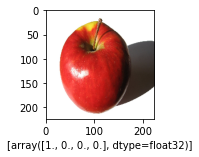

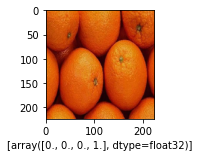

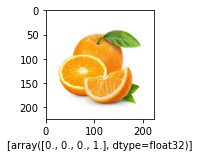

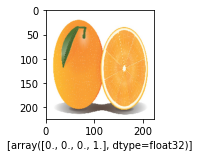

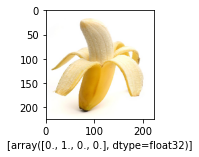

In [7]:
plot_sample(X_train, y_train, 1)
plot_sample(X_train, y_train, 2)
plot_sample(X_train, y_train, 3)
plot_sample(X_train, y_train, 4)
plot_sample(X_train, y_train, 5)

# Convolutional Neural Network Model

In [7]:
cnn = models.Sequential([
    #Image data augmentation layers
    layers.experimental.preprocessing.RandomFlip("horizontal"),
    layers.experimental.preprocessing.RandomFlip("vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
    #1st Convolutional and MaxPooling layer
    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    #2nd Convolutional and MaxPooling Layer
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    #3rd Convolutional and MaxPooling Layer
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    #Converts data into 1-d array
    layers.Flatten(),
    #fully connected layer
    layers.Dense(64, activation='relu'),
    #final Dense layer with 4 outputs
    layers.Dense(4, activation='softmax')
])

#Configures the model for training with
#1) Optimizer that implements the Adam algorithm
#2) Crossentropy metric class to be used when there are multiple label classes
#3) Measures accuracy as a metric


cnn.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])



# Training Our Image Classifier

In [8]:
import time
start_time=time.time()
history = cnn.fit(X_train, y_train, epochs=20)
time_model = time.time() - start_time
print(f"Time to train the model: {int(time_model)} seconds")

Epoch 1/20
8/8 [==============================] - 24s 3s/step - loss: 1.5031 - accuracy: 0.3000
Epoch 2/20
8/8 [==============================] - 26s 3s/step - loss: 1.2785 - accuracy: 0.4292
Epoch 3/20
8/8 [==============================] - 27s 3s/step - loss: 0.9993 - accuracy: 0.6167
Epoch 4/20
8/8 [==============================] - 25s 3s/step - loss: 0.8401 - accuracy: 0.6750
Epoch 5/20
8/8 [==============================] - 26s 3s/step - loss: 0.6679 - accuracy: 0.7458
Epoch 6/20
8/8 [==============================] - 25s 3s/step - loss: 0.4873 - accuracy: 0.8583
Epoch 7/20
8/8 [==============================] - 28s 3s/step - loss: 0.4160 - accuracy: 0.8417
Epoch 8/20
8/8 [==============================] - 26s 3s/step - loss: 0.4141 - accuracy: 0.8458
Epoch 9/20
8/8 [==============================] - 29s 4s/step - loss: 0.3737 - accuracy: 0.8625
Epoch 10/20
8/8 [==============================] - 26s 3s/step - loss: 0.2944 - accuracy: 0.9125
Epoch 11/20
8/8 [======================

# Summary Of Model

In [9]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
random_flip (RandomFlip)     (None, 224, 224, 3)       0         
_________________________________________________________________
random_flip_1 (RandomFlip)   (None, 224, 224, 3)       0         
_________________________________________________________________
random_rotation (RandomRotat (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 222, 222, 128)     3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 128)     0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      73792     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0

# Test Accuracy

In [10]:
cnn.evaluate(X_test,y_test)

2/2 [==============================] - 2s 773ms/step - loss: 0.5834 - accuracy: 0.9167


[0.583406388759613, 0.9166666865348816]

# Plot of Model Accuracy

In [11]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

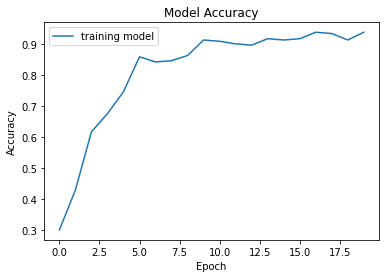

In [12]:
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['training model'], loc='upper left')
plt.show()

# Plot of Model Loss

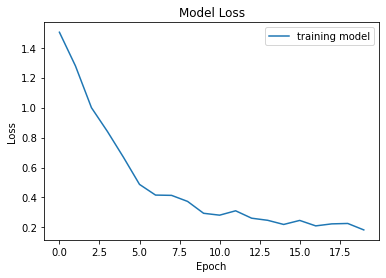

In [13]:
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['training model'], loc='upper right')
plt.show()